# Data Science Delivery Challenge

In [1]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier

In [167]:
# Primero, leeremos de los CSV los datos a estudiar 
train_data = pd.read_csv('data/train.csv')

In [168]:
# Además, mostraremos los datos de entrenamiento
train_data

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus
...,...,...,...,...,...,...,...,...
54325,33443728,13:54:33,AR,63825,PAID,2,10.39,DeliveredStatus
54326,33499561,17:16:09,AR,27741,PAID,1,9.07,DeliveredStatus
54327,32895248,20:14:59,PA,65895,PAID,2,1.65,DeliveredStatus
54328,32792276,13:24:05,ES,20134,PAID,6,8.04,DeliveredStatus


## 1: ¿Cuáles son los 3 paises en los que más pedidos se realizan?

Dentro de la tabla de entrenamiento, deberemos sumar todos los pedidos que se han realizado por país y sacaremos los 3 con el mayor número.

In [7]:
train_data['country_code'].value_counts()[:3]

AR    11854
ES    11554
TR     5696
Name: country_code, dtype: int64

Con el estandar ISO, los 3 países que más pedidos realizan son:

    - Argentina (AR), con un total de 11854 envíos
    - España (ES), con un total de 11554 envíos
    - Turkey (TR), con un total de 5696 envíos

## 2. ¿Cuáles son las horas en las que se realizan más pedidos en España?

Primero, deberemos coger los datos de España que hayan en la tabla de entrenamiento. Luego, en base a dichos datos, sacaremos el número de pedidos que se realizan en las diferentes horas que hayan registradas.

In [169]:
spain_data = train_data.loc[train_data['country_code']=='ES']
time = pd.to_datetime(spain_data['local_time'], format='%H:%M:%S', exact=True)

In [170]:
time

3       1900-01-01 20:15:21
8       1900-01-01 17:09:16
13      1900-01-01 18:02:18
19      1900-01-01 14:37:58
24      1900-01-01 21:12:30
                ...        
54289   1900-01-01 15:07:11
54301   1900-01-01 15:53:29
54304   1900-01-01 20:43:08
54320   1900-01-01 20:52:39
54328   1900-01-01 13:24:05
Name: local_time, Length: 11554, dtype: datetime64[ns]

Como podemos apreciar en la siguiente línea, este conjunto de datos no contiene ningún NaN. Por ende, los datos están limpios.

In [103]:
spain_data['local_time'].isna().sum()

0

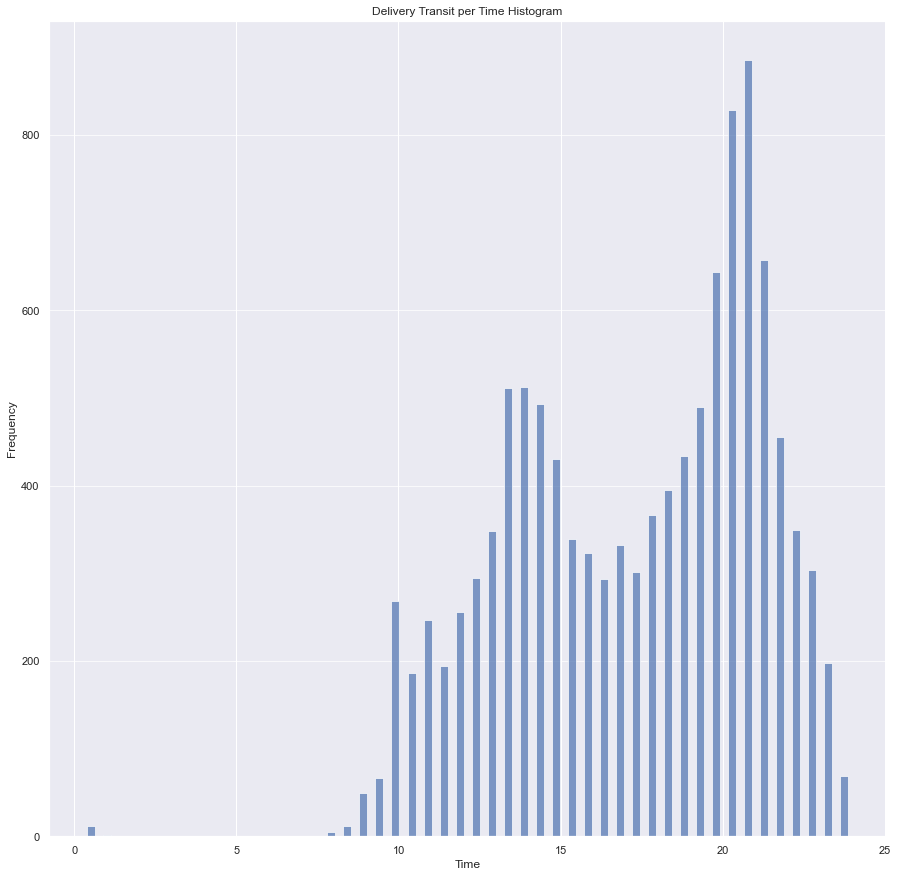

In [176]:
spain_data = spain_data.drop(['local_time'], axis=1)
spain_data['local_time'] = time.dt.hour + time.dt.minute/60 + time.dt.second/3600

plt.figure(figsize=(15, 15))

n, bins, patches = plt.hist(spain_data['local_time'], bins=48, alpha=0.7, rwidth=0.5)
# spain_data['local_time'].hist(bins=24,rwidth=0.5, figsize=(15, 15))

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Delivery Transit per Time Histogram')
plt.show()

In [189]:
a = sorted([x for x in zip(n, bins)])
for i in a:
    print('The bin with value of :', i[1], ' has a frequency of: ', i[0])

The bin with value of : 1.2603587962962963  has a frequency of:  0.0
The bin with value of : 1.7545659722222222  has a frequency of:  0.0
The bin with value of : 2.2487731481481483  has a frequency of:  0.0
The bin with value of : 2.742980324074074  has a frequency of:  0.0
The bin with value of : 3.2371875  has a frequency of:  0.0
The bin with value of : 3.7313946759259258  has a frequency of:  0.0
The bin with value of : 4.225601851851852  has a frequency of:  0.0
The bin with value of : 4.719809027777778  has a frequency of:  0.0
The bin with value of : 5.214016203703704  has a frequency of:  0.0
The bin with value of : 5.708223379629629  has a frequency of:  0.0
The bin with value of : 6.202430555555556  has a frequency of:  0.0
The bin with value of : 6.696637731481482  has a frequency of:  0.0
The bin with value of : 7.190844907407407  has a frequency of:  0.0
The bin with value of : 0.7661516203703704  has a frequency of:  1.0
The bin with value of : 7.685052083333334  has a fr

Podemos ver que las horas puntas se centran más a la noche, entre las 20 y 21, además de tener a parte otra subida alrededor de la 13:30. Cosa que encaja debido a los horarios habituales de comidas y cenas.

## 3. ¿Cuál es el precio medio por pedido en la tienda con ID 12513?

Para este problema deberemos de coger la media de la Serie, de la columna product_totals. Perì antes de ello deberemos de filtar los pedidos con la tienda que tiene un store_adress con el ID 12513.

In [4]:
train_data['payment_status'].unique()

array(['PAID', 'NOT_PAID', 'DELAYED'], dtype=object)

In [68]:
import numpy as np

store_12513 = train_data.loc[train_data['store_address']==12513]
store_12513_PAID = temp.loc[train_data['payment_status']=='PAID']

print('The Store with ID 12513 has:\n')
print('- The mean of all deliveries is: ', store_12513['products_total'].mean())
print('- The mean of paid deliveries is: ', store_12513_PAID['products_total'].mean(), '\n')

print('- The median of all deliveries is: ', store_12513['products_total'].median())
print('- The median of paid deliveries is: ', store_12513_PAID['products_total'].median())

The Store with ID 12513 has:

- The mean of all deliveries is:  17.392244897959173
- The mean of paid deliveries is:  17.424793388429745 

- The median of all deliveries is:  16.2
- The median of paid deliveries is:  16.1


## 4. Distribución de repartidores por turnos para hacer frente a los picos de demanda.


Para este problema primero ploteraemos su histograma para hacernos un insight, además de ver la función de distribución. Después cogeremeos la frecuencia del histograma de 3 bins, a partir de ahí será hacer el porcentaje de repartidores proporcional al de la demanda en los turnos a repartir.

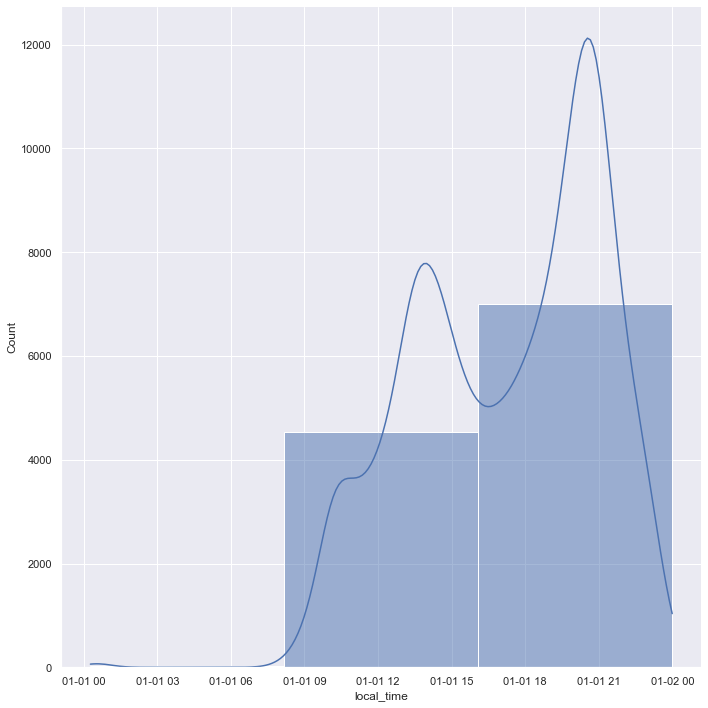

In [92]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})

sns.displot(spain_data['local_time'], kde=True, 
             bins=3, height=10)

In [202]:
n, bins = np.histogram(spain_data['local_time'], bins=3)

for i in sorted([x for x in zip(n, bins)]):
    print('The bin with value of :', i[1], ' has a frequency of: ', i[0])

The bin with value of : 0.27194444444444443  has a frequency of:  18
The bin with value of : 8.17925925925926  has a frequency of:  4530
The bin with value of : 16.086574074074075  has a frequency of:  7006


In [203]:
total = n.sum()
employers_percent = [x/total for x in n] 

employers_percent

[0.0015579020252726328, 0.3920720096936126, 0.6063700882811147]

El porcentaje de repartidores quedaría de la siguiente forma segun los datos:

Turno 1 (00:00-08:00): Un 0.155 % de los repartidores disponibles

Turno 2 (08:00-16:00): Un 39.207 % de los repartidores disponibles

Turno 3 (16:00-00:00): Un 60.637 % de los repartidores disponibles

Estos porcentajes están basados en el número de entregas sobre las jornadas laborables.

## 5. Predicción del estado final del pedido.

In [2]:
train_data = pd.read_csv('data/train.csv')
y_train = train_data['final_status']
train_data.drop(['final_status'], axis=1, inplace=True)

test_data = pd.read_csv('data/test_X.csv', sep=';')
frames = [train_data, test_data]

print('Train_data starts from 0 to: ', len(train_data)-1)
print('Test_data starts from ', len(train_data), ' to: ', len(train_data) + len(test_data) -1 )
df = pd.concat(frames).reset_index()
df

Train_data starts from 0 to:  54329
Test_data starts from  54330  to:  54359


,index,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total
0,0,33446280,14:11:09,AR,55379,PAID,2,11.88
1,1,33107339,11:47:41,GT,23487,PAID,2,5.20
2,2,32960645,11:53:53,CR,62229,PAID,1,6.03
3,3,32089564,20:15:21,ES,29446,PAID,6,6.37
4,4,32157739,21:32:16,AR,13917,PAID,1,5.36
...,...,...,...,...,...,...,...,...
54355,25,32160619,21:51:05,AR,21110,PAID,1,0.89
54356,26,33435482,16:55:31,ES,47795,PAID,10,20.40
54357,27,33336368,22:32:02,FR,3705,PAID,2,4.95
54358,28,33180028,17:44:53,PA,18746,PAID,1,7.58


In [3]:
df.drop(['order_id'], axis=1, inplace=True)
df

,index,local_time,country_code,store_address,payment_status,n_of_products,products_total
0,0,14:11:09,AR,55379,PAID,2,11.88
1,1,11:47:41,GT,23487,PAID,2,5.20
2,2,11:53:53,CR,62229,PAID,1,6.03
3,3,20:15:21,ES,29446,PAID,6,6.37
4,4,21:32:16,AR,13917,PAID,1,5.36
...,...,...,...,...,...,...,...
54355,25,21:51:05,AR,21110,PAID,1,0.89
54356,26,16:55:31,ES,47795,PAID,10,20.40
54357,27,22:32:02,FR,3705,PAID,2,4.95
54358,28,17:44:53,PA,18746,PAID,1,7.58


In [4]:
def change_time(df): 
    time = pd.to_datetime(df['local_time'], format='%H:%M:%S', exact=True)
    df.drop(['local_time'], axis=1)
    df['local_time'] = time.dt.hour + time.dt.minute/60 + time.dt.second/3600
change_time(df)
df

,index,local_time,country_code,store_address,payment_status,n_of_products,products_total
0,0,14.185833,AR,55379,PAID,2,11.88
1,1,11.794722,GT,23487,PAID,2,5.20
2,2,11.898056,CR,62229,PAID,1,6.03
3,3,20.255833,ES,29446,PAID,6,6.37
4,4,21.537778,AR,13917,PAID,1,5.36
...,...,...,...,...,...,...,...
54355,25,21.851389,AR,21110,PAID,1,0.89
54356,26,16.925278,ES,47795,PAID,10,20.40
54357,27,22.533889,FR,3705,PAID,2,4.95
54358,28,17.748056,PA,18746,PAID,1,7.58


In [5]:
def one_hot_encoding_var(df):
    one_hot_country = pd.get_dummies(df.country_code, prefix='Country')
    one_hot_payment_status = pd.get_dummies(df.payment_status, prefix='Payment_Status')
    df.drop(['country_code', 'payment_status'], axis=1, inplace=True)
    df = df.join(one_hot_country)
    df = df.join(one_hot_payment_status)
    return df
df = one_hot_encoding_var(df)
df

,index,local_time,store_address,n_of_products,products_total,Country_AR,Country_BR,Country_CI,Country_CL,Country_CR,...,Country_PE,Country_PR,Country_PT,Country_RO,Country_TR,Country_UA,Country_UY,Payment_Status_DELAYED,Payment_Status_NOT_PAID,Payment_Status_PAID
0,0,14.185833,55379,2,11.88,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,11.794722,23487,2,5.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,11.898056,62229,1,6.03,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,20.255833,29446,6,6.37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,21.537778,13917,1,5.36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54355,25,21.851389,21110,1,0.89,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54356,26,16.925278,47795,10,20.40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54357,27,22.533889,3705,2,4.95,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54358,28,17.748056,18746,1,7.58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54360 entries, 0 to 54359
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    54360 non-null  int64  
 1   local_time               54360 non-null  float64
 2   store_address            54360 non-null  int64  
 3   n_of_products            54360 non-null  int64  
 4   products_total           54360 non-null  float64
 5   Country_AR               54360 non-null  uint8  
 6   Country_BR               54360 non-null  uint8  
 7   Country_CI               54360 non-null  uint8  
 8   Country_CL               54360 non-null  uint8  
 9   Country_CR               54360 non-null  uint8  
 10  Country_DO               54360 non-null  uint8  
 11  Country_EC               54360 non-null  uint8  
 12  Country_EG               54360 non-null  uint8  
 13  Country_ES               54360 non-null  uint8  
 14  Country_FR            

In [6]:
train_data = df[:54330]
test_data = df[54330:54360]

In [7]:
train_data

,index,local_time,store_address,n_of_products,products_total,Country_AR,Country_BR,Country_CI,Country_CL,Country_CR,...,Country_PE,Country_PR,Country_PT,Country_RO,Country_TR,Country_UA,Country_UY,Payment_Status_DELAYED,Payment_Status_NOT_PAID,Payment_Status_PAID
0,0,14.185833,55379,2,11.88,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,11.794722,23487,2,5.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,11.898056,62229,1,6.03,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,20.255833,29446,6,6.37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,21.537778,13917,1,5.36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54325,54325,13.909167,63825,2,10.39,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54326,54326,17.269167,27741,1,9.07,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54327,54327,20.249722,65895,2,1.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54328,54328,13.401389,20134,6,8.04,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
test_data

,index,local_time,store_address,n_of_products,products_total,Country_AR,Country_BR,Country_CI,Country_CL,Country_CR,...,Country_PE,Country_PR,Country_PT,Country_RO,Country_TR,Country_UA,Country_UY,Payment_Status_DELAYED,Payment_Status_NOT_PAID,Payment_Status_PAID
54330,0,17.835833,68169,1,61.63,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54331,1,18.635556,8220,11,15.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54332,2,22.199722,11169,4,5.89,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54333,3,22.231944,33371,3,7.85,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54334,4,12.017778,33958,2,4.75,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
54335,5,11.260833,51386,2,14.28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54336,6,18.305000,16351,5,14.35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54337,7,20.352500,49659,2,4.42,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
54338,8,18.938056,32273,2,1.79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
54339,9,13.723889,17782,5,29.89,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
rnd_forest = RandomForestClassifier()

rnd_forest.fit(train_data, y_train)

RandomForestClassifier()

In [10]:
y_pred = rnd_forest.predict(test_data)

In [11]:
result = pd.DataFrame({'final_status': y_pred})
dict_rep = {'CanceledStatus': 0, 'DeliveredStatus':1}
result = result.replace({'final_status': dict_rep})
result.to_csv('predictions.csv', index=False)